# Predicting price of a laptop

# Table of contents
1. [Introduction](#introduction)
2. [Import](#import)
3. [Data preprocessing](#preprocess)
    1. [Missing values](#subpreprocess)
4. [Correlation with dependent variable](#correlation_dependent)
5. [Feature engineering](#feature_engineering)
    1. [One-hot encoding](#one-hot)
6. [Importance of variables](#importance)
    1. [Correlation between variables with highest importance score](#correlation_importance)
    2. [Variables selection](#variables_selection)
7. [Scaling data](#scaling)
8. [Train-test split](#train_test)
9. [Base estimator - linear regression](#base_estimator)
10. [Xgboost](#xgboost)
11. [Summary and future plan](#summary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost as xgb

Importing data from unpacked zip file

In [2]:
dataset = pd.read_json("dane_do_wyslania/public-dataset.json")
dataset_test = pd.read_json("dane_do_wyslania/hidden-Xs.json")
dataset.columns

Index(['buynow_price', 'rodzaj karty graficznej', 'komunikacja',
       'rozdzielczość (piksele)', 'liczba rdzeni procesora',
       'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
       'sterowanie', 'multimedia', 'typ pamięci ram',
       'taktowanie bazowe procesora (ghz)', 'seria procesora', 'stan',
       'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy '],
      dtype='object')

We will look how does the dataset looks like

In [3]:
dataset.reset_index().head(5)

,index,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
0,0,5524.0,grafika dedykowana,[bluetooth],1920 x 1080,4,12 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki]",ddr4,2.6,intel core i7,nowy,480.0,producenta,"15"" - 15.9"""
1,10,1720.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1600 x 900,4,4 gb,[windows 10 home],hdd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,2.2,amd a8,nowy,1000.0,producenta,"17"" - 17.9"""
2,100,2649.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,12 gb,[windows 10 home],ssd + hdd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.3,intel core i3,nowy,1240.0,producenta,"15"" - 15.9"""
3,1000,1199.0,grafika zintegrowana,[bluetooth],1366 x 768,2,2 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, mikrofon]",ddr3,1.6,intel celeron,nowy,128.0,producenta,"11.9"" i mniej"
4,10000,4049.0,grafika dedykowana,"[lan 10/100/1000 mbps, nfc (near field communi...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, mikrofon]",ddr4,2.7,intel core i5,nowy,256.0,producenta,"15"" - 15.9"""


In [4]:
dataset_test.head(5)

,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
1,grafika zintegrowana,None,1366 x 768,2,4 gb,[windows 8.1 professional 64-bit],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",None,2.4,intel core i3,nowy,500.0,producenta,"15"" - 15.9"""
10002,grafika zintegrowana,[bluetooth],1920 x 1080,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[kamera, głośniki, mikrofon]",ddr4,2.5,intel core i5,nowy,256.0,producenta,"13"" - 13.9"""
10003,None,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,4 gb,[windows 7 professional 64-bit],None,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.8,amd a6,nowy,120.0,producenta,"15"" - 15.9"""
10004,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1600 x 900,2,12 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.5,intel core i5,nowy,480.0,producenta,"17"" - 17.9"""
10005,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 professional],hdd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.8,amd a6,nowy,1000.0,producenta,"15"" - 15.9"""


In [5]:
dataset_test.shape

(3869, 16)

In [6]:
print(dataset.shape, dataset.dtypes, sep = '\n')

(7853, 17)
buynow_price                         float64
rodzaj karty graficznej               object
komunikacja                           object
rozdzielczość (piksele)               object
liczba rdzeni procesora               object
wielkość pamięci ram                  object
system operacyjny                     object
typ dysku twardego                    object
sterowanie                            object
multimedia                            object
typ pamięci ram                       object
taktowanie bazowe procesora (ghz)    float64
seria procesora                       object
stan                                  object
pojemność dysku (gb)                 float64
gwarancja                             object
wielkość matrycy                      object
dtype: object


So, we have less than 8K records with 17 features. What we can already observe from preliminiary look at the data is the fact that most of them are categorical variables, however not all of the categories differ in the same way. 
For example "rozdzielczość (piksele)" and "wielkość pamięci ram" features have some order associated with them. Those are called ordinal features. On the other hand we have "typ dysku twardego" or "sterowanie" which are categorical features. There are also variables which can be considered purely categorical, such as "seria procesora", however it may be possible to tell which series of the processors have better performance in general (like superior performance of i7 series as compared to i5 series). One can think of possible arguments in AMD vs Intel competition that could be revealed during this task :)

We are going to check whether there are some missing values in dataset

In [7]:
def missing_values(data):
    missing = data.isnull().sum()
    percent = data.isnull().sum()/data.isnull().count()
    data_missing = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'], sort=True).sort_values(by='Total', ascending=False)
    print(data_missing.head(6))
    return data_missing

And the plot all of these variables that contain some missing part

In [8]:
def plot_missing_values(data_missing, title="Title"):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
    sns.barplot(data=data_missing[data_missing['Percent'] >0].reset_index(), x = 'index', 
                y='Percent')
    plt.xticks(rotation=70)
    plt.title(title)
    plt.show()

                                   Total   Percent
taktowanie bazowe procesora (ghz)    936  0.119190
typ pamięci ram                      864  0.110022
komunikacja                          782  0.099580
multimedia                           708  0.090157
sterowanie                           678  0.086336
system operacyjny                    650  0.082771


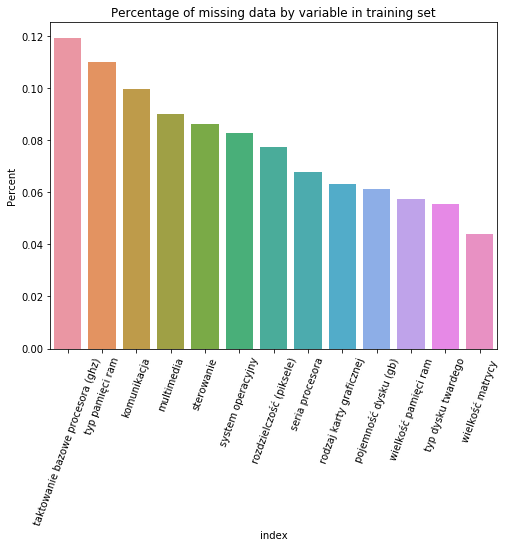

In [9]:
plot_missing_values(missing_values(dataset),"Percentage of missing data by variable in training set")

                                   Total   Percent
taktowanie bazowe procesora (ghz)    451  0.116568
typ pamięci ram                      415  0.107263
komunikacja                          401  0.103644
multimedia                           356  0.092013
sterowanie                           332  0.085810
system operacyjny                    322  0.083226


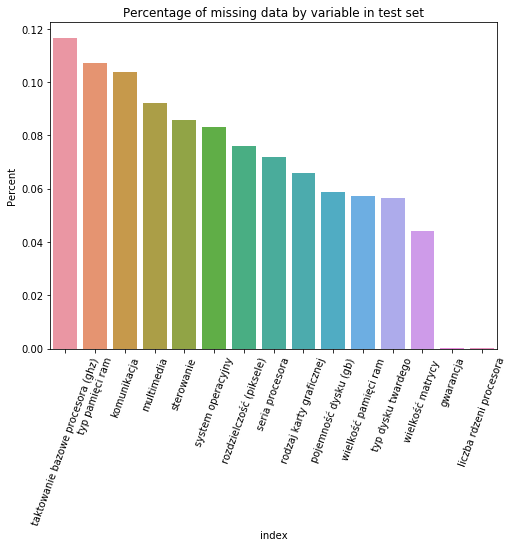

In [10]:
plot_missing_values(missing_values(dataset_test),"Percentage of missing data by variable in test set")

So one can see that the distribution of missing values is quite similar both in training and test set

## Comparing distribution of features of training and test test

## Imputation of missing values